In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import collections  as mc
import seaborn as sns
import pandas as pd
style.use('ggplot')

from tools import cell_average

In [2]:
# reference solution (h = 2^-5)
ref = np.loadtxt("laplace_mesh_refine/laplace-6.txt")
x5 = ref[:, 0]
y5 = ref[:, 1]
sol5 = ref[:, 2]

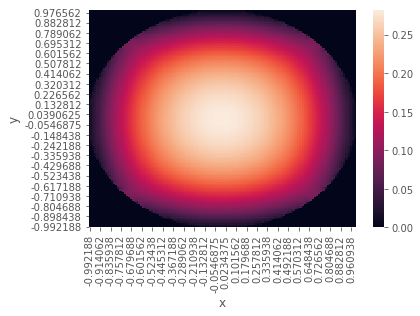

In [3]:
data = {'x': ref[:, 0], 'y': ref[:, 1], 'solution': ref[:, 2]}
df = pd.DataFrame(data=data)
pivot = df.pivot(index='y', columns='x', values='solution')
ax = sns.heatmap(pivot)
ax.invert_yaxis()

In [15]:
norm = []
for i in range(4):
    array = np.loadtxt("laplace_mesh_refine/laplace-%d.txt" % i)
    x = array[:, 0]
    y = array[:, 1]
    sol = array[:, 2]
    # rebin so we can compare
    average = cell_average(sol5, int(np.sqrt(len(sol))))
    print(average)
    print(sol)
    norm.append(np.max(np.abs(average - sol)))


[0.12349484 0.12349484 0.12349484 0.12349484]
[-0.25 -0.25 -0.25 -0.25]
[0.03128873 0.11082488 0.11082488 0.03128873 0.11082488 0.24104088
 0.24104087 0.11082488 0.11082488 0.24104088 0.24104087 0.11082488
 0.03128873 0.11082488 0.11082488 0.03128873]
[-0.0371313 -0.086122  -0.086122  -0.0371313 -0.0861221  0.0388779
  0.0388779 -0.0861221 -0.0861221  0.0388779  0.0388779 -0.0861221
 -0.0371313 -0.086122  -0.086122  -0.0371313]
[0.         0.01070528 0.04793062 0.06969269 0.06969269 0.04793062
 0.01070528 0.         0.01070528 0.10374433 0.15124034 0.17443587
 0.17443587 0.15124034 0.10374433 0.01070528 0.04793062 0.15124034
 0.21177042 0.24029935 0.24029935 0.21177042 0.15124034 0.04793062
 0.06969269 0.17443587 0.24029935 0.27179439 0.27179439 0.24029935
 0.17443587 0.06969269 0.06969269 0.17443587 0.24029935 0.27179439
 0.27179439 0.24029935 0.17443587 0.06969269 0.04793062 0.15124034
 0.21177042 0.24029935 0.24029935 0.21177042 0.15124034 0.04793062
 0.01070528 0.10374433 0.1512403

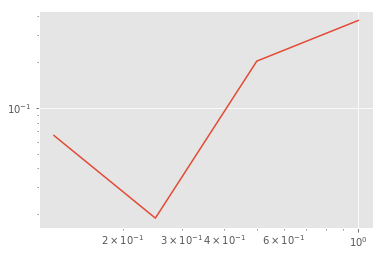

In [6]:
h = np.array([1, .5, .25, .125])
plt.loglog(h, norm)

In [7]:
norm

[0.373494839896631,
 0.20216297500000036,
 0.01888838698671877,
 0.06579101718750004]

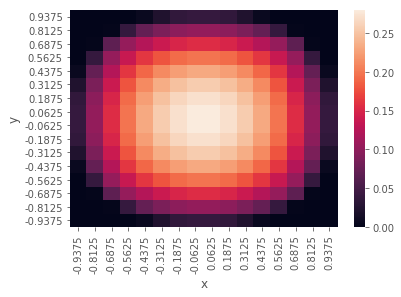

In [8]:
data = {'x': x, 'y': y, 'solution': average}
df = pd.DataFrame(data=data)
pivot = df.pivot(index='y', columns='x', values='solution')
ax = sns.heatmap(pivot)
ax.invert_yaxis()

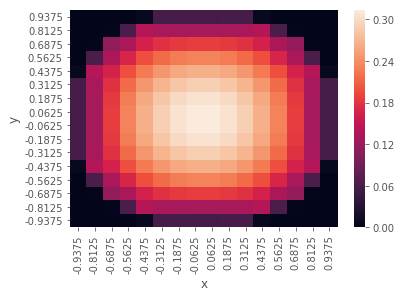

In [9]:
data = {'x': x, 'y': y, 'solution': sol}
df = pd.DataFrame(data=data)
pivot = df.pivot(index='y', columns='x', values='solution')
ax = sns.heatmap(pivot)
ax.invert_yaxis()

In [9]:
sol

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
def ij_to_global(num_x_, i_index, j_index):
    return num_x_*i_index + j_index;

In [44]:
ij_to_global(32, 10, 22)

342

In [45]:
sol[342]

-0.00176389

In [43]:
sol[329]

0.00370543

In [19]:
sol[330]

0.177492

In [23]:
sol[693]

0.107612

In [25]:
sol[341]

0.139109

In [27]:
sol[682]

0.139109

In [13]:
def check_symmetry(array):
    n = int(np.sqrt(len(array)))
    for i in range(n):
        for j in range(i + 1):
            if array[ij_to_global(n, i, j)] != array[ij_to_global(n, j, i)]:
                print("Symmetry broken: cell (", i, ",", j, ") not equal to cell (", j, ",", i, ")")
            if array[ij_to_global(n, i, j)] != array[ij_to_global(n, i, n - j - 1)]:
                print("Symmetry broken: cell (", i, ",", j, ") not equal to cell (", i, ",", n - j - 1, ")")
            if array[ij_to_global(n, i, j)] != array[ij_to_global(n, n - i - 1, j)]:
                print("Symmetry broken: cell (", i, ",", j, ") not equal to cell (", n - i - 1, ",", j, ")")

In [14]:
check_symmetry(sol)

Symmetry broken: cell ( 9 , 0 ) not equal to cell ( 0 , 9 )
Symmetry broken: cell ( 15 , 6 ) not equal to cell ( 6 , 15 )
Symmetry broken: cell ( 15 , 6 ) not equal to cell ( 15 , 9 )
Symmetry broken: cell ( 15 , 6 ) not equal to cell ( 0 , 6 )
Symmetry broken: cell ( 15 , 9 ) not equal to cell ( 15 , 6 )
Symmetry broken: cell ( 15 , 9 ) not equal to cell ( 0 , 9 )


In [47]:
square = np.loadtxt("square_solution.txt")

In [52]:
check_symmetry(square[:, 2])

In [51]:
square[:, 2]

array([0., 0., 0., ..., 0., 0., 0.])